# <font color='#eb3483'> Logistic Regression </font>

In this module, we'll be exploring how to build a logistic regression model using scikit-learn. Remember, logistic regression is a binary classification algorithm, so instead of predicting a number (regression) or a group of labels (i.e. multi-class classification) we'll be predicting either true or false. Let's start by importing our usual toolkit.

In [17]:
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn import datasets

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

import warnings
warnings.simplefilter("ignore")

## <font color='#eb3483'> Breast Cancer Data </font>

We are going to use the [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Is a dataset that contains measurements computed from digitized images of fine needle aspirate (FNA) breast mass samples. The goal is to predict whether the cells are benign (non-cancerous) or malignant (cancerous).

The images look like this one:

![title](media/breast_cancer.png)

In [18]:
cancer_data = datasets.load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
print(cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

This dataset is a binary classification problem, where the target variable can be either a negative or positive. It is encoded as a 0 or a 1.

In [20]:
cancer_data["target"][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

We can see the target labels (the names the 0 and 1 represent) by reading the key `target_names`

In [21]:
cancer_data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

So we see that the 0 means the cell is sample and a 1 means its benign.

In [22]:
cancer_df = pd.DataFrame(cancer_data["data"],
                         columns=cancer_data["feature_names"])

cancer_df["target"] = cancer_data["target"]

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**The independent variables are measurements taken on the cell images, mostly measures of the cell nucleii**

In [23]:
cancer_df.shape

(569, 31)

In [24]:
cancer_df["target"].value_counts(True)

1    0.627417
0    0.372583
Name: target, dtype: float64

So we see that 62.7% of the samples are benign and 37.3% are malignant

## <font color='#eb3483'> Logistic Regression in Scikit-learn </font>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
LogisticRegression?

### <font color='#eb3483'> 1) Let's split our data set into train test split </font>

In [27]:
X = cancer_df[cancer_data["feature_names"]]
y = cancer_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#80% of data used for training, 20% for testing

In [28]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test ',y_test.shape)

X_train:  (455, 30)
X_test:  (114, 30)
y_train:  (455,)
y_test  (114,)


This estimator (or classifier, another name for classification problems estimators) is used the same way as LinearRegression.

### <font color='#eb3483'>  2) Create and fit the logistic regression model </font>

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### <font color='#eb3483'> 3) See the model predictions </font>

In [16]:
predictions = model.predict(X_test)

predictions[:10]

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

We see the `predict` method directly outputs the predicted class (0 or 1). If we want to see the probabilities the model assign to each class (that means, how confident the method is that the observation belongs to one class or the other) we can use the method `predict_proba`.

In [32]:
 np.set_printoptions(suppress=True) # uncomment this to suppress scientific notation
predictions_probabilities = model.predict_proba(X_test)
predictions_probabilities[:10]

# why are there two columns of results here?
#probability that it's zero, that i's one

array([[0.10654845, 0.89345155],
       [0.00303779, 0.99696221],
       [0.04358462, 0.95641538],
       [0.02875115, 0.97124885],
       [0.10438528, 0.89561472],
       [0.00272371, 0.99727629],
       [0.00220517, 0.99779483],
       [0.00217648, 0.99782352],
       [0.99999638, 0.00000362],
       [0.02613615, 0.97386385]])

<AxesSubplot:xlabel='Prob0'>

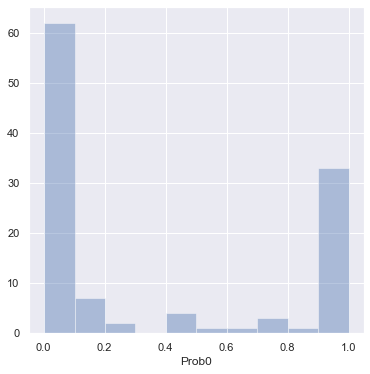

In [33]:
sns.distplot(predictions_probabilities[:,0], bins= 10, kde = False, label = 'Prob0', axlabel = 'Prob0')

<AxesSubplot:xlabel='Prob1'>

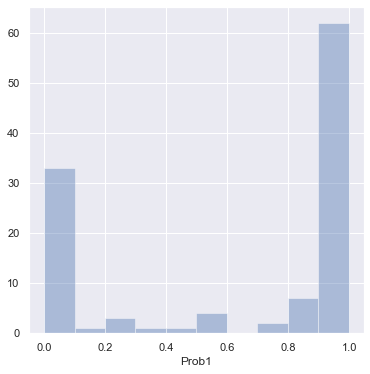

In [34]:
sns.distplot(predictions_probabilities[:,1], bins = 10, kde = False, label = 'Prob1', axlabel = 'Prob1')

We can see how each class predictions change with the predicted probabilities.

In [36]:
probs_df = pd.DataFrame(predictions_probabilities)
probs_df = round(probs_df, 2)
probs_df.head(10)

,0,1
0,0.11,0.89
1,0.00,1.00
2,0.04,0.96
3,0.03,0.97
4,0.10,0.90
5,0.00,1.00
6,0.00,1.00
7,0.00,1.00
8,1.00,0.00
9,0.03,0.97


We can check how the model computes the probabilities and assigns a class given a threshold

In [37]:
X = X_test.reset_index().copy()
X["target"] = y_test.tolist()
X["prediction"] = predictions
X = pd.concat([X, probs_df], axis=1)
X[["target", "prediction", 0, 1]].head(20)

,target,prediction,0,1
0,1,1,0.11,0.89
1,1,0,0.00,1.00
2,1,1,0.04,0.96
3,1,1,0.03,0.97
4,1,0,0.10,0.90
5,1,1,0.00,1.00
6,1,0,0.00,1.00
7,1,0,0.00,1.00
8,0,1,1.00,0.00
9,1,1,0.03,0.97


By default the threshold for this split is 0.5.

The logistic regression model, has many hyperparameters.

In [38]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
LogisticRegression?

The most important hyperparameters are:
- **penalty** : `l1` or `l2` the regularization method
- **fit_intercept**: `True` or `False`, if you want the intercept in the linear model
- **C** : float, inverse of regularization; the lower the float, the more the model will regularize the feature coefficients

Extra reading on regularization: https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c and https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c